# Medical Cost Analysis


Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance
In this project, you will be trying to develop an end-to-end data science application using the
dataset given above. The aim of the project is to estimate the approximate cost of a person's
health insurance based on the given variables. While creating the project, try to follow the
instructions below and make sure that the project is unique.

## Creating a Google Colaboratory File

1. Make sure your project has .ipynb extension.
2. Make sure that there are comment lines explaining the details in your project.
3. When submitting the project, submit the cells of this .ipynb file so that the cells are
run and the results are visible.

## Importing Required Libraries

1. Import the required libraries for the project to the Colab environment.
2. Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis.

In [1]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Import ML Classifiers
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Perform An Exploratory Data Analysis
Analyze the data and draw meaningful conclusions from the data.
1. Examine the distribution of Bmi (Body Mass Index)
2. Examine the relationship between “smoker” and “charges”
3. Examine the relationship between “smoker” and “region”.
4. Examine the relationship between “bmi” and “sex”.
5. Find the "region" with the most "children".
6. Examine the relationship between “age” and “bmi”.
7. Examine the relationship between “bmi” and “children”.
8. Is there an outlier in the "bmi" variable? Please review.
9. Examine the relationship between “bmi” and “charges”.
10. Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

Try to use data visualization techniques as much as possible while examining the
data.

Please add the meanings you deduced from the analyzes as a comment line.

In [2]:
# To read the data from the .csv file.
data = pd.read_csv("insurance.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset comprises 1338 entries.

It consists of 7 columns, each representing different aspects of individuals' health insurance data.

Columns include:

age: Age of the individuals (numerical - int64)

sex: Gender of the individuals (categorical - object)

bmi: Body Mass Index (numerical - float64)

children: Number of children/dependents covered (numerical - int64)

smoker: Smoking status (categorical - object)

region: Region of individuals (categorical - object)

charges: Medical charges (numerical - float64)

There are no missing values (Non-Null Count for all columns is 1338).

The data types include 2 float columns, 2 int columns, and 3 object columns (for categorical data).

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

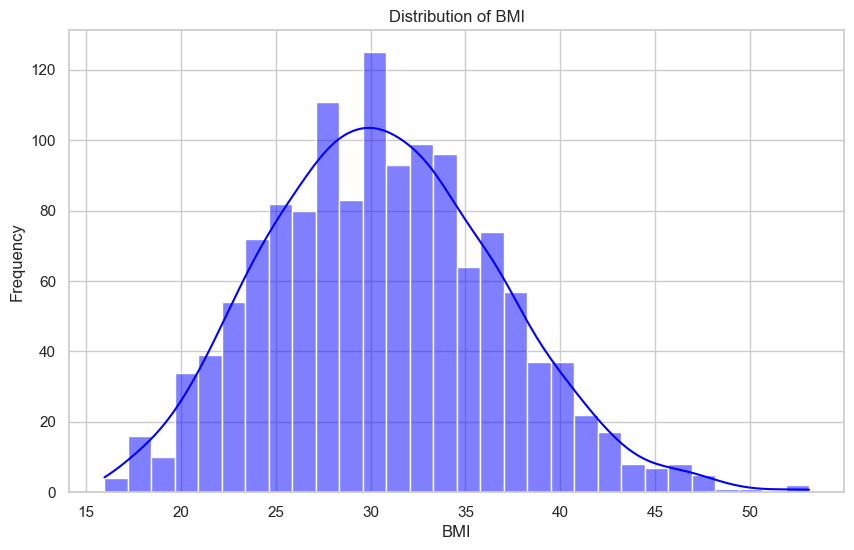

In [6]:
# To examine the distribution of BMI (Body Mass Index).

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram of BMI distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='bmi', bins=30, kde=True, color='blue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

I've examined the distribution of the Body Mass Index (BMI) variable in my dataset. The distribution appears to be normal, which is a positive finding. A normal distribution implies that the BMI values are centered around a mean value with a symmetrical spread on both sides. This can be beneficial for building regression models, as many regression algorithms assume normally distributed residuals. Normality simplifies the interpretation of model coefficients and can lead to more accurate predictions. Morever, it's look that there are some outliers in BMI values after the value of 50.

In [7]:
#To examine the relationship between “smoker” and “charges”

correlation = data['smoker'].map({'no': 0, 'yes': 1}).corr(data['charges'])
print(f"Correlation between 'smoker' and 'charges': {correlation:.2f}")

Correlation between 'smoker' and 'charges': 0.79


The correlation value between "smoker" and "charges" quantifies their relationship. A positive correlation value indicates that as the smoking status changes from non-smoker to smoker, the medical charges tend to increase. This suggests that being a smoker is associated with higher medical charges on average.

The correlation provide evidence that smoking status has an impact on medical charges.

In [8]:
#To examine the relationship between “smoker” and "region".

cross_tab = pd.crosstab(data['smoker'], data['region'])
print(cross_tab)

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


To examine the relationship between the "smoker" variable and the "region" variable using a correlation matrix doesn't make sense because correlation matrices are used to measure the linear relationship between numerical variables. Since both "smoker" and "region" are categorical variables, they don't have a linear relationship that can be captured by correlation.

However, we can still examine the relationship between "smoker" and "region" using cross-tabulation or creating a contingency table to see the distribution of smokers and non-smokers in each region. This will help us understand how smoking habits are distributed across different regions.

In [9]:
# Create a contingency table
contingency_table = pd.crosstab(data['region'], data['smoker'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

Chi-squared statistic: 7.34
P-value: 0.0617


The p-value of 0.0617 is greater than the common significance level of 0.05. This suggests that there is no statistically significant relationship between the "region" and "smoker" variables at the 0.05 significance level. In other words, the distribution of smokers and non-smokers across different regions is not significantly different from what we would expect by chance.

        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13


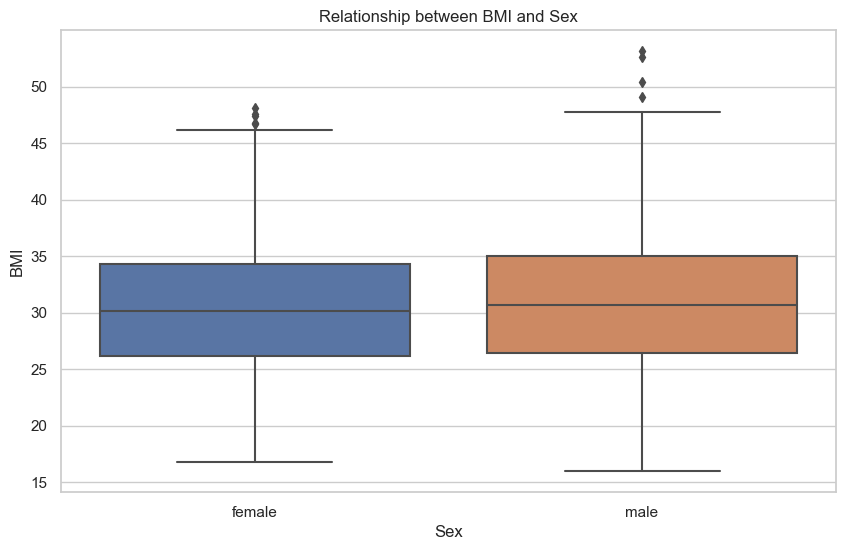

Correlation between 'sex' and 'bmi': 0.05


In [10]:
#To examine the relationship between "bmi" and "sex".
summary_stats = data.groupby('sex')['bmi'].describe()
print(summary_stats)

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='sex', y='bmi')
plt.title('Relationship between BMI and Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

correlation = data['sex'].map({'female': 0, 'male': 1}).corr(data['bmi'])
print(f"Correlation between 'sex' and 'bmi': {correlation:.2f}")

Both males and females have similar mean BMI values, with females having a slightly lower mean.

The standard deviation indicates the spread of BMI values around the mean for each gender.

The median is close to the 50th percentile and represents the middle value in the distribution.

The percentiles (25th and 75th) indicate the range within which a certain percentage of individuals fall.

The range of BMI values for both genders is quite substantial, with minimum values close to 16 and maximum values around 48 to 53.

On average, the BMI values for males and females are similar.

Since correlation between 'sex' and 'bmi'is 0.05. This means that there are no strong relationship between them.

Both genders have a considerable range of BMI values, with some individuals having significantly higher or lower BMI values than the mean.

Region with the most children: northwest
Highest average number of children: 1.15


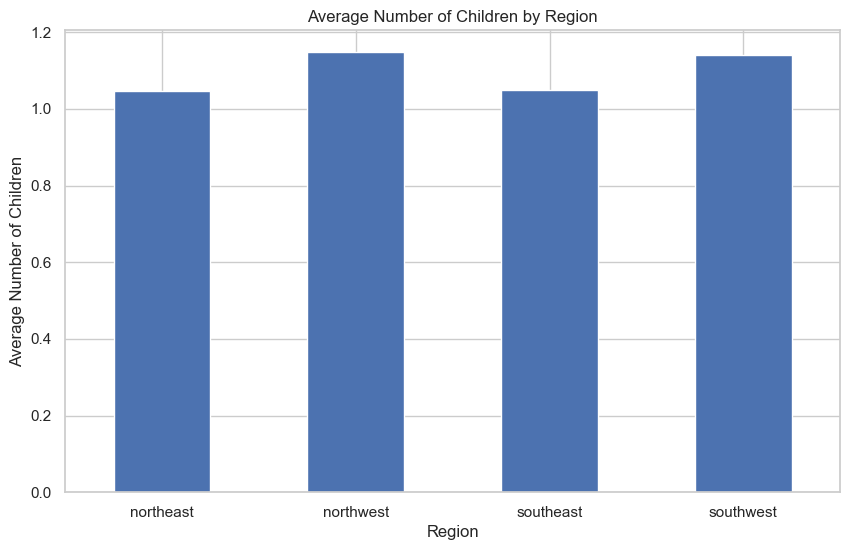

children     0   1   2   3  4  5
region                          
northeast  147  77  51  39  7  3
northwest  132  74  66  46  6  1
southeast  157  95  66  35  5  6
southwest  138  78  57  37  7  8


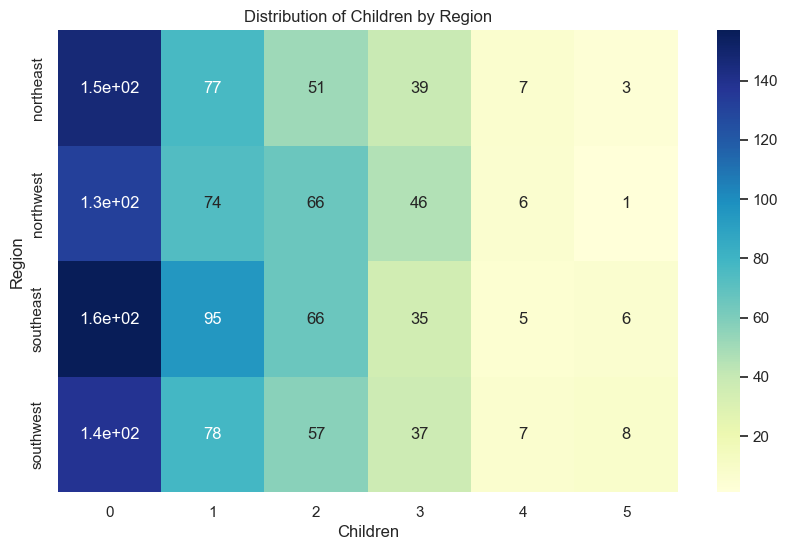

In [11]:
#To examine the relationship between "region" and "children".
# Group by 'region' and calculate the mean number of children for each region
children_by_region = data.groupby('region')['children'].mean()

# Find the region with the highest average number of children
region_with_most_children = children_by_region.idxmax()
max_children_avg = children_by_region.max()

print(f"Region with the most children: {region_with_most_children}")
print(f"Highest average number of children: {max_children_avg:.2f}")

plt.figure(figsize=(10, 6))
children_by_region.plot(kind='bar')  # Fixed variable name here
plt.title('Average Number of Children by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Children')
plt.xticks(rotation=0)
plt.show()

cross_tab_children = pd.crosstab(data['region'], data['children'])
print(cross_tab_children)

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_children, annot=True, cmap="YlGnBu")
plt.title('Distribution of Children by Region')
plt.xlabel('Children')
plt.ylabel('Region')
plt.show()

The analysis indicates that the region with the most children is the "northwest." The highest average number of children is observed in this region, with an average of approximately 1.15 children per individual.

From the provided information, we can infer that there might be a slight relationship between the "region" and the average number of "children." The "northwest" region has the highest average number of children, while the "southeast" and "northeast" regions have relatively lower averages.

Also, the cross-tabulation provides insights into the distribution of individuals with varying numbers of children across different regions.

In the "northeast" region, there are more individuals with no children (147) compared to other regions.
The "southeast" region has the highest count of individuals with one child (95).
The distribution of individuals with two, three, and four children is relatively consistent across regions.
The "southeast" region has the highest count of individuals with five children (6).

Correlation between 'age' and 'bmi': 0.11


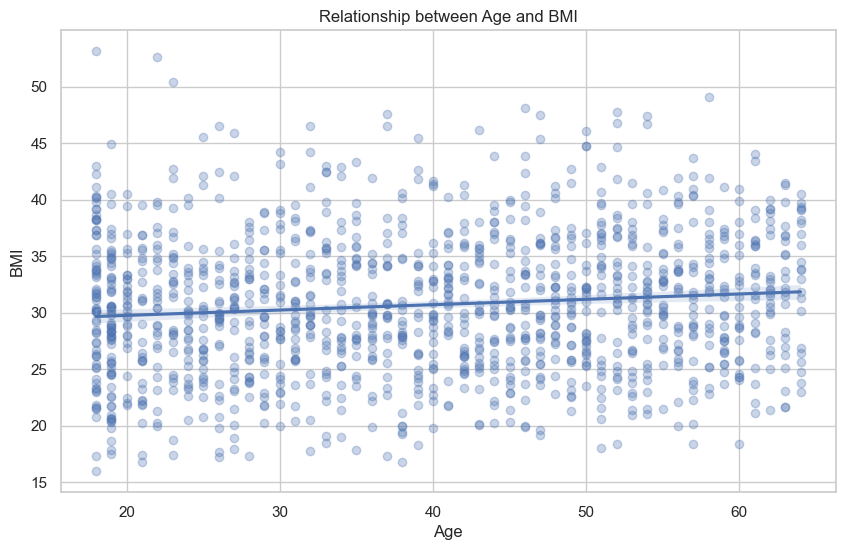

In [12]:
#To examine the relationship between "age" and "bmi".

correlation_age_bmi = data['age'].corr(data['bmi'])
print(f"Correlation between 'age' and 'bmi': {correlation_age_bmi:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x=data['age'], y=data['bmi'], scatter_kws={'alpha':0.3})
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

The correlation coefficient between "age" and "bmi" is 0.11. This value suggests a very weak positive linear relationship between age and BMI.

A correlation coefficient of 0.11 indicates that there is a slight positive tendency between age and BMI. However, the relationship is weak, implying that as age increases, there is a minor tendency for BMI to also increase, but the effect is not very strong.

Since the correlation is close to 0, it suggests that age and BMI are not strongly related in a linear fashion.

Correlation between 'bmi' and 'children': 0.01


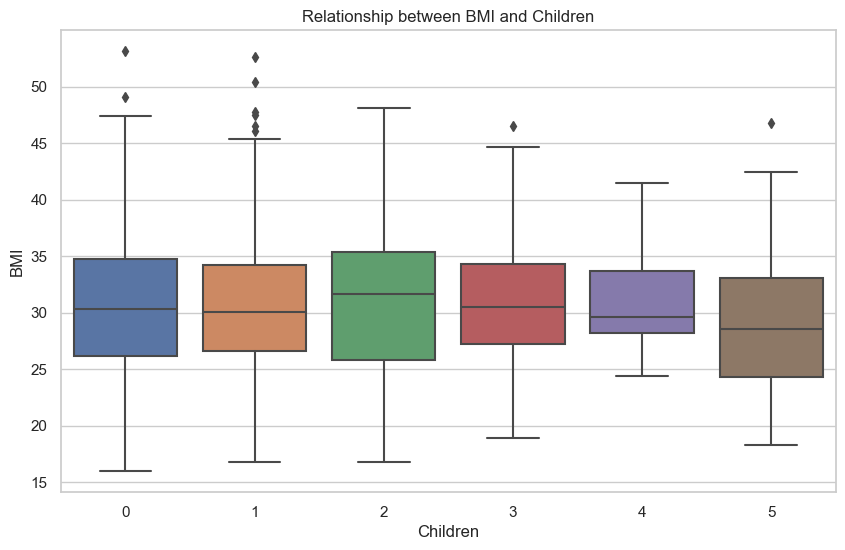

In [13]:
#To examine the relationship between "bmi" and "children".

correlation_bmi_children = data['bmi'].corr(data['children'])
print(f"Correlation between 'bmi' and 'children': {correlation_bmi_children:.2f}")


plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='children', y='bmi')
plt.title('Relationship between BMI and Children')
plt.xlabel('Children')
plt.ylabel('BMI')
plt.show()


A correlation coefficient of 0.01 suggests a very weak positive linear relationship between "bmi" and the number of "children." This indicates that, on average, there is a minor tendency for BMI to slightly increase as the number of children increases. However, the relationship is very weak and might not be practically significant.

Number of outliers: 9
Percentage of outliers: 0.67%


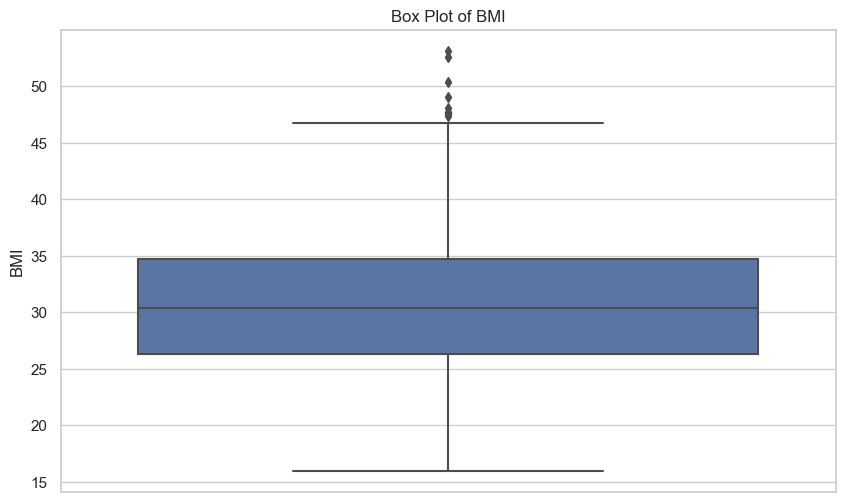

In [14]:
# Calculate the interquartile range (IQR) for 'bmi'
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)]

# Calculate the number of outliers and their percentage
num_outliers = len(outliers)
total_observations = len(data)
percentage_outliers = (num_outliers / total_observations) * 100

print(f"Number of outliers: {num_outliers}")
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='bmi')
plt.title('Box Plot of BMI')
plt.ylabel('BMI')
plt.show()


The outliers appear as points outside the whiskers of the box plot. Outliers are typically defined as points that are outside the "whiskers" of the box plot, which extend to 1.5 times the interquartile range (IQR) above the third quartile and below the first quartile.

There are 9 outliers in the "bmi" variable, which makes up approximately 0.67% of the total observations. These outliers are observations that fall outside the range defined by the interquartile range (IQR) method, indicating that they deviate significantly from the central distribution of "bmi" values. 

Correlation between 'bmi' and 'charges': 0.20


C:\Users\brnak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


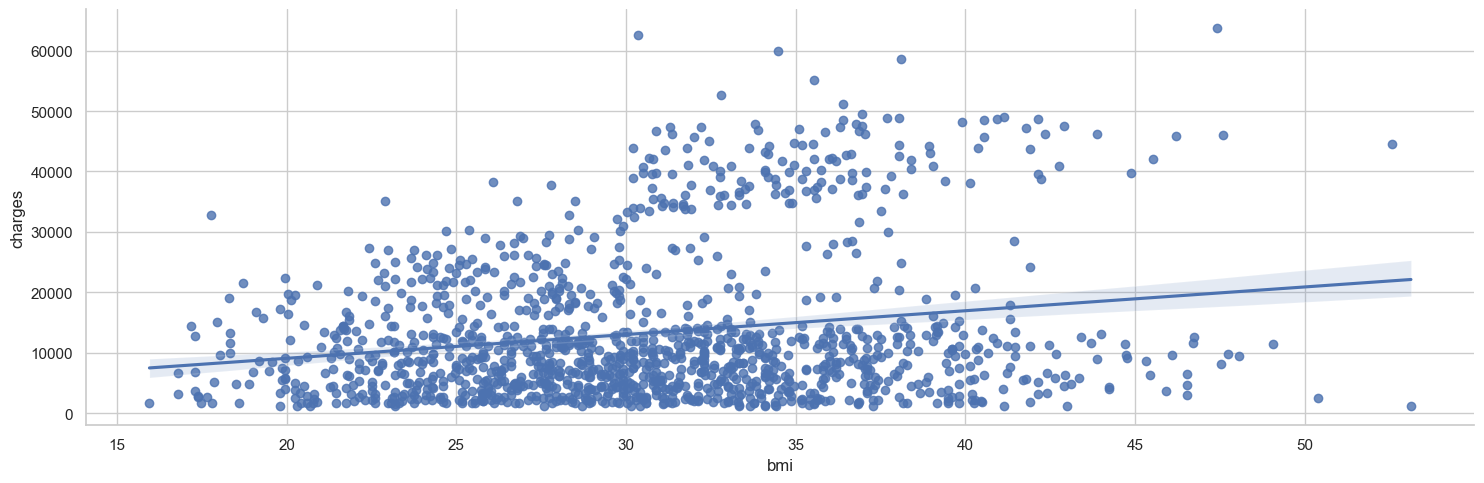

In [15]:
# To examine the relationship between “bmi” and “charges” with correlation and visulation
correlation_bmi_charges = data['bmi'].corr(data['charges'])
print(f"Correlation between 'bmi' and 'charges': {correlation_bmi_charges:.2f}")

sns.lmplot(data=data, x='bmi', y='charges', aspect=3)
plt.show()

The correlation coefficient between "bmi" and "charges" is 0.20. This positive correlation value suggests a weak positive linear relationship between BMI and medical charges.

A correlation of 0.20 indicates that there is a slight tendency for BMI and medical charges to increase together. However, the relationship is not very strong, and other factors likely contribute to the variability in medical charges.

The scatter plot or the alternative visualizations mentioned earlier can provide a visual representation of this relationship and help you better understand how BMI and medical charges are distributed and related. 

C:\Users\brnak\AppData\Local\Temp\ipykernel_7880\3613486.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='region', y='bmi', hue='smoker', ci=None)


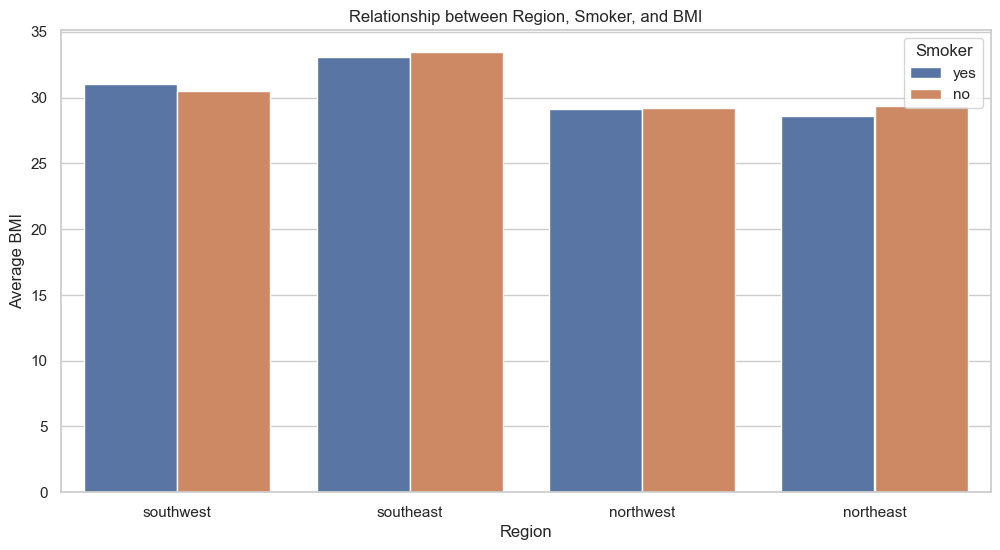

In [16]:
# To examine the relationship between “region”, “smoker” and “bmi” using bar plot.
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='region', y='bmi', hue='smoker', ci=None)
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.legend(title='Smoker')
plt.show()

To examine the relationship between the categorical variables "region," "smoker," and the numerical variable "bmi," you can create a bar plot that shows the average "bmi" for each combination of "region" and "smoker."

In this bar plot, the x-axis represents the "region," the y-axis represents the average "bmi," and the bars are grouped by "smoker" status. Each bar represents the average "bmi" for a specific combination of "region" and "smoker."

When we compare the average BMI with the smoking status of people in the regions, we see the highest rate of smokers and the lowest rate of smokers in the southeast region. When we compare smoker or non-smoker status according to BMI, we do not see big differences.

## Data Preprocessing


1. In this section, prepare the data you have, for training the model.
2. Use Label Encoding and One-Hot Encoding techniques to deal with categorical
variables.
3. Split your dataset into X_train,X_test, y_train, y_test.
4. Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).


In [17]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [18]:
# Label Encoding for 'sex', 'smoker'
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# Perform one-hot encoding on the 'region' column
data_encoded = pd.get_dummies(data, columns=['region'], prefix='region')

# Perform label encoding on the 'region' column labels again since they are "True" or "False"
data_encoded['region_northeast'] = label_encoder.fit_transform(data_encoded['region_northeast'])
data_encoded['region_northwest'] = label_encoder.fit_transform(data_encoded['region_northwest'])
data_encoded['region_southeast'] = label_encoder.fit_transform(data_encoded['region_southeast'])
data_encoded['region_southwest'] = label_encoder.fit_transform(data_encoded['region_southwest'])

# Display the first few rows of the preprocessed data
data_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [19]:
# 'data_encoded' is my new DataFrame after one-hot encoding
X = data_encoded.drop('charges', axis=1)  # Features (excluding the 'charges' column)
y = data_encoded['charges']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the sets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 9)
X_test shape: (268, 9)
y_train shape: (1070,)
y_test shape: (268,)


In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection


In [21]:
# Initialize the models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Train the models on the scaled training data
linear_reg.fit(X_train_scaled, y_train)
random_forest_reg.fit(X_train_scaled, y_train)
gradient_boosting_reg.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
linear_reg_preds = linear_reg.predict(X_test_scaled)
random_forest_preds = random_forest_reg.predict(X_test_scaled)
gradient_boosting_preds = gradient_boosting_reg.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(predictions, y_true):
    mae = mean_absolute_error(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    return mae, mse, r2

linear_reg_scores = evaluate_model(linear_reg_preds, y_test)
random_forest_scores = evaluate_model(random_forest_preds, y_test)
gradient_boosting_scores = evaluate_model(gradient_boosting_preds, y_test)

# Print the evaluation scores
print("Linear Regression:")
print("MAE:", linear_reg_scores[0])
print("MSE:", linear_reg_scores[1])
print("R-squared:", linear_reg_scores[2])
print()

print("Random Forest Regression:")
print("MAE:", random_forest_scores[0])
print("MSE:", random_forest_scores[1])
print("R-squared:", random_forest_scores[2])
print()

print("Gradient Boosting Regression:")
print("MAE:", gradient_boosting_scores[0])
print("MSE:", gradient_boosting_scores[1])
print("R-squared:", gradient_boosting_scores[2])


Linear Regression:
MAE: 4194.940289700189
MSE: 33761413.95614809
R-squared: 0.7825333989415747

Random Forest Regression:
MAE: 2551.3606989662017
MSE: 21087106.761003636
R-squared: 0.8641721155568924

Gradient Boosting Regression:
MAE: 2406.4354394960446
MSE: 18757911.820982926
R-squared: 0.8791751041007578


The linear regression model explains approximately 78.3% of the variance in the target variable. The model's predictions have an average absolute error of around 4194.94 units.

The random forest regression model provides improved performance compared to linear regression, explaining approximately 86.4% of the variance in the target variable. The model's predictions have an average absolute error of around 2551.36 units.

The gradient boosting regression model achieves the best performance among the three, explaining approximately 87.9% of the variance in the target variable. The model's predictions have an average absolute error of around 2406.44 units.

Based on these evaluation scores, the Gradient Boosting Regression model seems to be the most effective for estimating health insurance charges. It has the lowest MAE, MSE, and highest R-squared, indicating better predictive performance compared to the other models.

In [22]:
# Initialize the models
models = [linear_reg, random_forest_reg, gradient_boosting_reg]

# Perform cross-validation for each model
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    avg_mae = -scores.mean()  # Negate to convert back to positive MAE
    std_mae = scores.std()
    
    print(type(model).__name__)
    print("Average MAE:", avg_mae)
    print("Standard Deviation of MAE:", std_mae)
    print()


LinearRegression
Average MAE: 4245.613712107703
Standard Deviation of MAE: 244.88338939251443

RandomForestRegressor
Average MAE: 2718.7119785923396
Standard Deviation of MAE: 165.6570105230397

GradientBoostingRegressor
Average MAE: 2676.7370282572606
Standard Deviation of MAE: 194.66267119682647



On average, the Linear Regression model's predictions have an absolute error of approximately 4245.61 units. The standard deviation of MAE indicates that the performance varies by around 244.88 units across different cross-validation folds.

The Random Forest Regression model performs better than Linear Regression, with an average absolute error of around 2718.71 units. The standard deviation of MAE is relatively lower at approximately 165.66 units, indicating more consistent performance.

The Gradient Boosting Regression model achieves the best average performance among the three models, with an average absolute error of approximately 2676.74 units. The standard deviation of MAE is around 194.66 units.

Based on the cross-validation results, the Gradient Boosting Regression model still appears to be the most effective in terms of predictive performance, with the lowest average MAE. The Random Forest model follows closely, while the Linear Regression model has a higher average MAE.

Overall, the Random Forest and Gradient Boosting models continue to stand out as strong performers, with the Gradient Boosting model showing the most consistent performance across both initial and cross-validation evaluations. It's worth considering the Gradient Boosting model as the final choice for my health insurance cost estimation task.

In [23]:
# Define the hyperparameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

# Initialize the Gradient Boosting Regression model
gb_reg = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Perform grid search on the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)  # Negate to get positive MAE


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Best MAE: 2646.3669073574547


In [24]:
# Initialize the optimized Gradient Boosting Regression model with best hyperparameters
optimized_gb_reg = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=100,
    random_state=42
)

# Train the optimized model on the scaled training data
optimized_gb_reg.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
optimized_gb_preds = optimized_gb_reg.predict(X_test_scaled)

# Evaluate the optimized model using various metrics
optimized_mae = mean_absolute_error(y_test, optimized_gb_preds)
optimized_mse = mean_squared_error(y_test, optimized_gb_preds)
optimized_r2 = r2_score(y_test, optimized_gb_preds)

# Print the evaluation metrics
print("Optimized Gradient Boosting Regression:")
print("Mean Absolute Error (MAE):", optimized_mae)
print("Mean Squared Error (MSE):", optimized_mse)
print("R-squared:", optimized_r2)


Optimized Gradient Boosting Regression:
Mean Absolute Error (MAE): 2402.7869653522066
Mean Squared Error (MSE): 18933519.981616497
R-squared: 0.8780439633890357


Best Hyperparameters:

Learning Rate: 0.1

Max Depth: 3

Min Samples Leaf: 1

Min Samples Split: 4

Number of Estimators: 100

Best MAE achieved during hyperparameter tuning: 2646.37



Performance on Test Set (After Optimization):

Mean Absolute Error (MAE): 2402.79

Mean Squared Error (MSE): 18933519.98

R-squared: 0.878

Comparing the optimized results with the initial evaluation, I've managed to reduce the MAE from 2406.44 to 2402.79, and the R-squared value remains strong at 0.878.

These improvements showcase the value of hyperparameter tuning and its impact on the model's performance.